In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint



 Set Up Kaggle Dataset Path

In [15]:
!pip install opendatasets kaggle


In [17]:
import opendatasets as od


# Downloading the Chest X-Ray Images (Pneumonia) dataset from Kaggle
dataset_url = 'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'
od.download(dataset_url)



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: husnaahmed
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:36<00:00, 66.9MB/s]


Import Necessary Libraries

In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


2. Define Directories and Data Generators

In [53]:
# Define directory where dataset is located (adjust path as per your setup)
dataset_dir = './chest-xray-pneumonia/chest_xray'

# Define data generators with augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and augment data
train_data = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

test_data = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


3. Build and Compile the Model

In [55]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


4. Train the Model

In [56]:
# Train the model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data)


Epoch 1/10
163/163 [==============================] - 783s 5s/step - loss: 0.4071 - accuracy: 0.8206 - val_loss: 0.4753 - val_accuracy: 0.8413
Epoch 2/10
163/163 [==============================] - 808s 5s/step - loss: 0.2277 - accuracy: 0.9080 - val_loss: 0.3902 - val_accuracy: 0.8349
Epoch 3/10
163/163 [==============================] - 792s 5s/step - loss: 0.1960 - accuracy: 0.9220 - val_loss: 0.6486 - val_accuracy: 0.7965
Epoch 4/10
163/163 [==============================] - 808s 5s/step - loss: 0.1811 - accuracy: 0.9321 - val_loss: 0.5452 - val_accuracy: 0.8189
Epoch 5/10
163/163 [==============================] - 756s 5s/step - loss: 0.1593 - accuracy: 0.9375 - val_loss: 0.2516 - val_accuracy: 0.9087
Epoch 6/10
163/163 [==============================] - 747s 5s/step - loss: 0.1506 - accuracy: 0.9434 - val_loss: 0.4204 - val_accuracy: 0.8542
Epoch 7/10
163/163 [==============================] - 746s 5s/step - loss: 0.1323 - accuracy: 0.9486 - val_loss: 0.6433 - val_accuracy: 0.8333

5. Evaluate Model Performance

In [57]:
# Evaluate model on test data
loss, accuracy = model.evaluate(test_data)
print(f'Test accuracy: {accuracy}')


20/20 [==============================] - 27s 1s/step - loss: 0.3750 - accuracy: 0.8862
Test accuracy: 0.8862179517745972


6. Visualize Training History (Optional)

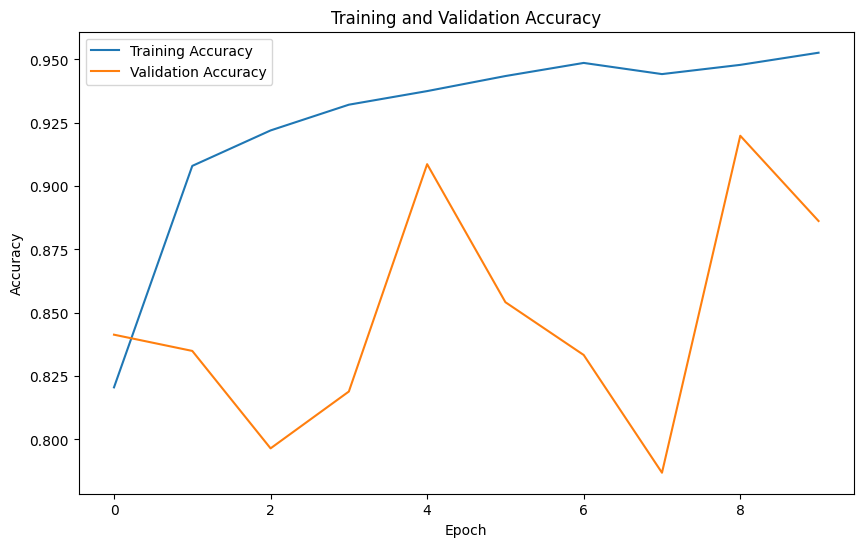

In [58]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
